In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
# Charger les données
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Classes du dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


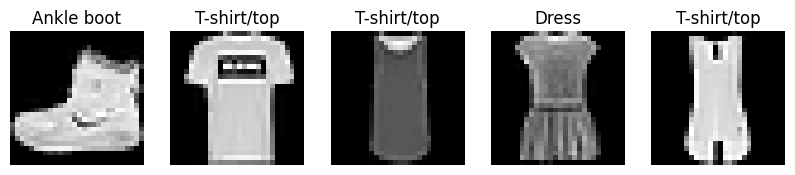

In [ ]:
# Afficher quelques images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(class_names[y_train[i]])
    ax.axis('off')
plt.show()

<ipython-input-4-f24573c6d095>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


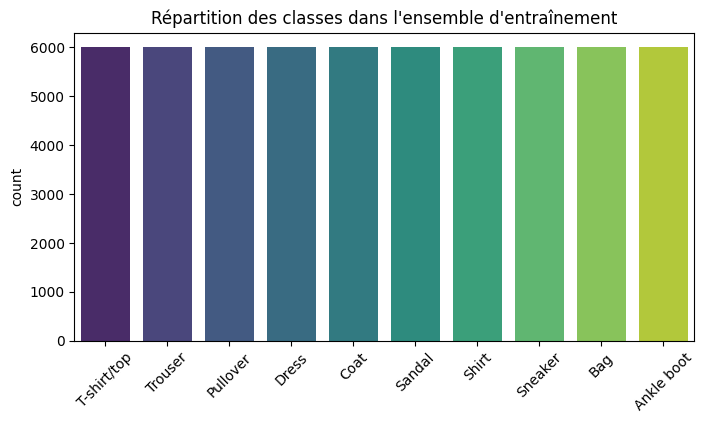

In [ ]:
# Distribution des classes
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette='viridis')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Répartition des classes dans l'ensemble d'entraînement")
plt.show()

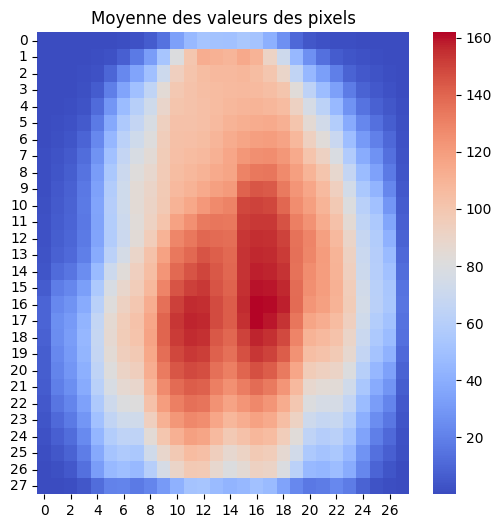

In [ ]:
# Statistiques sur les pixels
pixel_mean = x_train.mean(axis=0)
pixel_std = x_train.std(axis=0)

# Heatmap de la moyenne des pixels
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_mean, cmap='coolwarm')
plt.title("Moyenne des valeurs des pixels")
plt.show()

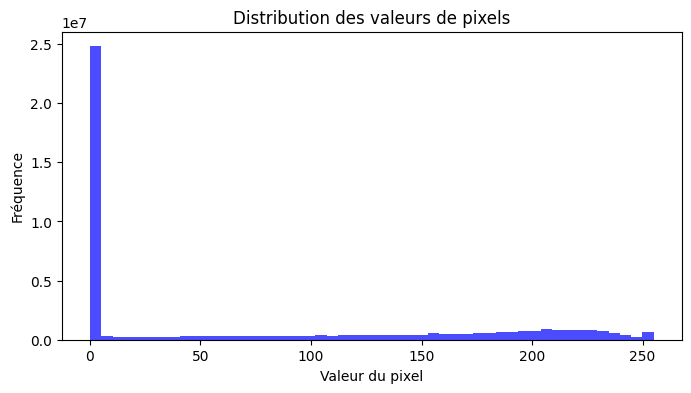

In [ ]:
# Histogramme des intensités de pixels
plt.figure(figsize=(8, 4))
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Distribution des valeurs de pixels")
plt.xlabel("Valeur du pixel")
plt.ylabel("Fréquence")
plt.show()

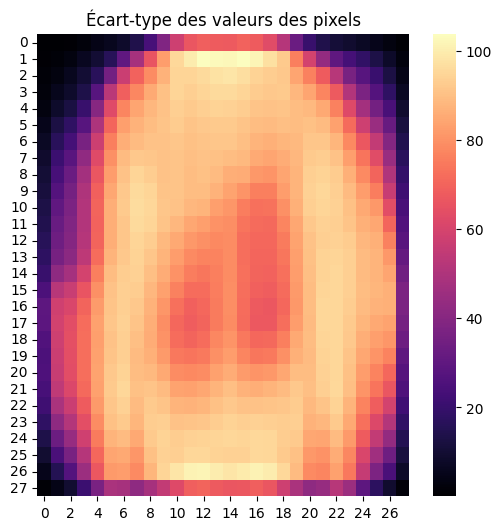

In [ ]:
# Visualisation des variations des images
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_std, cmap='magma')
plt.title("Écart-type des valeurs des pixels")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import mlflow
import mlflow.tensorflow
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.0/681.0 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Charger les données
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalisation des images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Encodage des labels en one-hot
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# Définition du modèle Dense
model_dense = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Définition du modèle CNN
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Préparation de TensorBoard et MLflow
log_dir = "logs/fashion_mnist"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
mlflow.tensorflow.autolog()

In [ ]:
with mlflow.start_run(run_name="Dense Model"):
    model_dense.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

with mlflow.start_run(run_name="CNN Model"):
    model_cnn.fit(x_train[..., np.newaxis], y_train, epochs=10, validation_data=(x_test[..., np.newaxis], y_test), callbacks=[tensorboard_callback])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7835 - loss: 0.6266

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7835 - loss: 0.6266 - val_accuracy: 0.8371 - val_loss: 0.4509
Epoch 2/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.3881

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8620 - loss: 0.3881 - val_accuracy: 0.8653 - val_loss: 0.3801
Epoch 3/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8772 - loss: 0.3386

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8772 - loss: 0.3386 - val_accuracy: 0.8672 - val_loss: 0.3683
Epoch 4/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8847 - loss: 0.3134

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8847 - loss: 0.3134 - val_accuracy: 0.8679 - val_loss: 0.3648
Epoch 5/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8873 - loss: 0.3052

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8874 - loss: 0.3051 - val_accuracy: 0.8696 - val_loss: 0.3592
Epoch 6/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8969 - loss: 0.2804

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8969 - loss: 0.2804 - val_accuracy: 0.8744 - val_loss: 0.3506
Epoch 7/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.2665

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8985 - loss: 0.2666 - val_accuracy: 0.8759 - val_loss: 0.3416
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9044 - loss: 0.2589

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9044 - loss: 0.2589 - val_accuracy: 0.8830 - val_loss: 0.3331
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9071 - loss: 0.2468 - val_accuracy: 0.8792 - val_loss: 0.3392
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9095 - loss: 0.2371 - val_accuracy: 0.8836 - val_loss: 0.3417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7789 - loss: 0.6121

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.7789 - loss: 0.6120 - val_accuracy: 0.8734 - val_loss: 0.3522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8882 - loss: 0.3051

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8882 - loss: 0.3051 - val_accuracy: 0.8930 - val_loss: 0.3025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9032 - loss: 0.2587

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9032 - loss: 0.2587 - val_accuracy: 0.9052 - val_loss: 0.2611
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9169 - loss: 0.2225

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9169 - loss: 0.2225 - val_accuracy: 0.9046 - val_loss: 0.2580
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9293 - loss: 0.1887

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9293 - loss: 0.1887 - val_accuracy: 0.9070 - val_loss: 0.2522
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9372 - loss: 0.1666 - val_accuracy: 0.9066 - val_loss: 0.2625
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9445 - loss: 0.1480 - val_accuracy: 0.9111 - val_loss: 0.2636
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9513 - loss: 0.1304 - val_accuracy: 0.9110 - val_loss: 0.2654
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9577 - loss: 0.1107 - val_accuracy: 0.9117 - val_loss: 0.3072
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9630 - loss: 0.0990 - val_accuracy: 0.9147 - val_loss: 0.2837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [ ]:


# Charger les modèles au format .keras
model_dense = tf.keras.models.load_model("model_dense.keras")
model_cnn = tf.keras.models.load_model("model_cnn.keras")

st.title("Prédiction des images Fashion MNIST")

# Télécharger une image
uploaded_file = st.file_uploader("Choisir une image", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Charger l'image
    img = Image.open(uploaded_file)
    img = img.convert("L")  # Convertir en niveaux de gris
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)  # Ajouter la dimension de canal
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter la dimension du batch


    # Prédictions
    pred_dense = model_dense.predict(img_array)
    pred_cnn = model_cnn.predict(img_array)

    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    st.image(img, caption="Image téléchargée", use_column_width=True)
    st.write(f"Prédiction avec Dense: {class_names[np.argmax(pred_dense)]}")
    st.write(f"Prédiction avec CNN: {class_names[np.argmax(pred_cnn)]}")


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
pip install streamlit

In [ ]:
model_dense.save("model_dense.keras")
model_cnn.save("model_cnn.keras")

In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image

# Charger les modèles correctement
model_dense = tf.keras.models.load_model("model_dense.keras")
model_cnn = tf.keras.models.load_model("model_cnn.keras")

st.title("Prédiction des images Fashion MNIST")

# Télécharger une image
uploaded_file = st.file_uploader("Choisir une image", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Charger l'image
    img = Image.open(uploaded_file)
    img = img.convert("L")  # Convertir en niveaux de gris
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)  # Ajouter la dimension de canal
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter la dimension du batch

    # Prédictions
    pred_dense = model_dense.predict(img_array)
    pred_cnn = model_cnn.predict(img_array)

    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    st.image(img, caption="Image téléchargée", use_column_width=True)
    st.write(f"Prédiction avec Dense: {class_names[np.argmax(pred_dense)]}")
    st.write(f"Prédiction avec CNN: {class_names[np.argmax(pred_cnn)]}")

In [ ]:
streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]